In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('Webscraping-Tmdb')
jovian.set_colab_id('1O4AU7aLXRKzinKcT1k3VP6lty-0Rqtnt')

     |████████████████████████████████| 68 kB 954 kB/s 


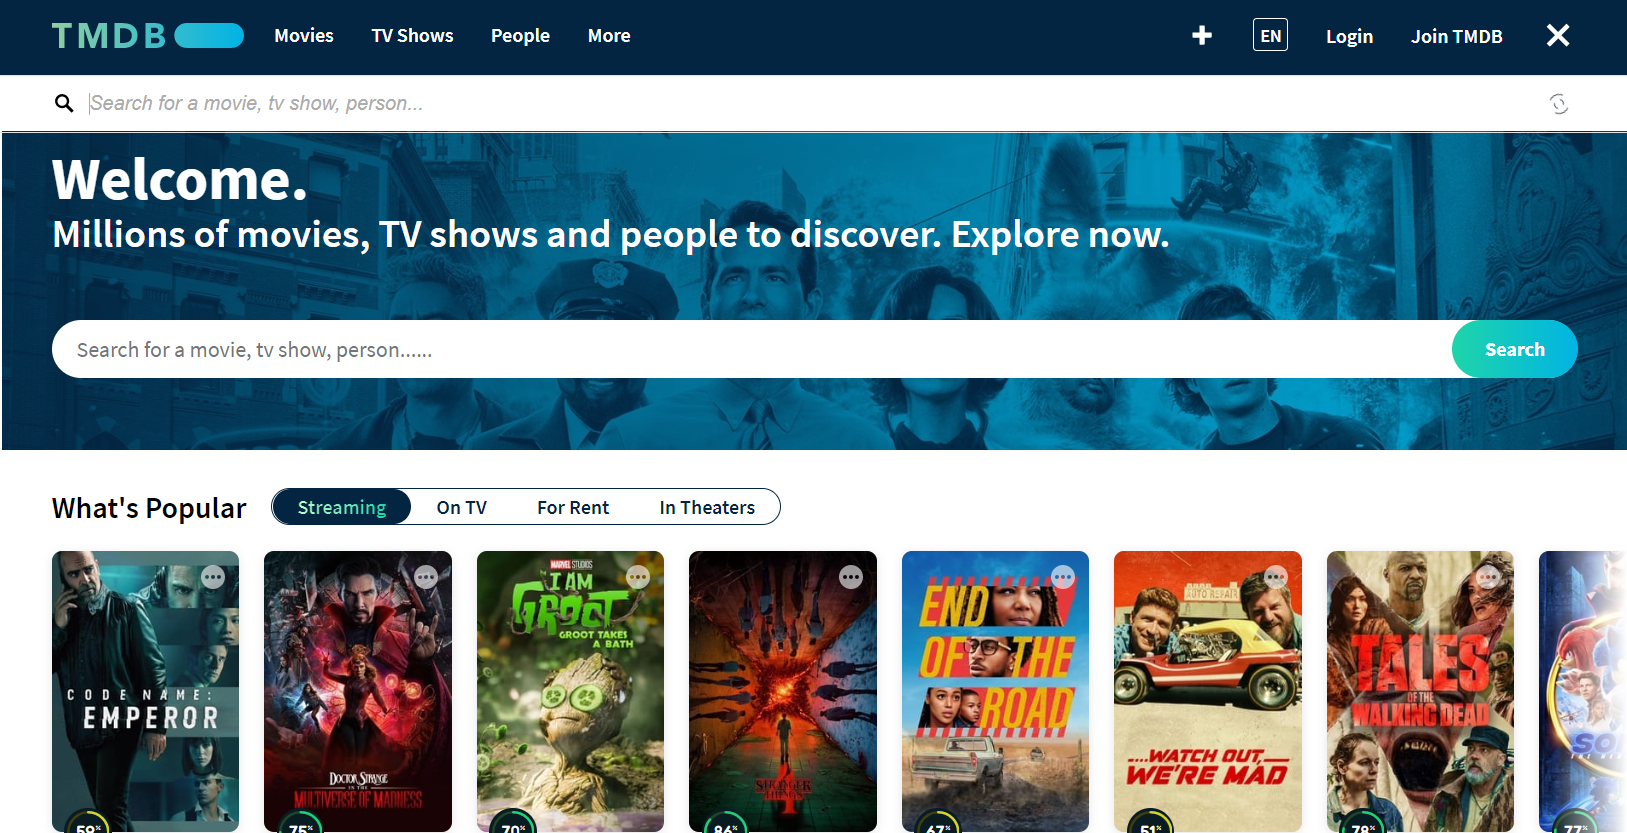

# Webscraping Popular Movies and TV Shows from TMDB

## Using Python, Requests and Beautifulsoup4

# Introduction:

The Movies Database or [TMDB]("https://www.themoviedb.org/") is a popular website hosting information about the millions of the movies, TV Shows and People from the Entertainment Industry. We will scrape some of this data to build our WebScraping Project.

This project is a part of DataScience and MachineLearning Bootcamp Course hosted on [Jovian]("https://jovian.ai/learn/zero-to-data-analyst-bootcamp").

[Web Scraping]("https://en.wikipedia.org/wiki/Web_scraping") any website involves fetching a page and extracting data from it. Fetching is the downloading of a page (which a browser does when a user views a page).

There are many tools/libraries like WebScrapper, Octoparse, Web Chrome Extensions which can scrape the information. 

Here in this project we will Web Scrape TMDB web site using Python libraries like [Requests]("https://pypi.org/project/requests/") and [BeautifulSoup4]("https://www.crummy.com/software/BeautifulSoup/bs4/doc/"). We will build many functions to extract handful of features to build our dataset. We will write the dataset information in the CSV format.

We will scrape TMDB Website to extract data for the Popular Movies and TV Shows from TMDB. 



# Outline of the Project:

1. Download TMDB Web Page.

2. Parse the HTML code of webpage.

3. Extract the data from the parsed HTML page in dictionary.

4. Create a list of data in dictionaries.

5. Write data to CSV using Pandas DataFrame.


**Detailed Plan of the Project:**

1. Download the TMDB [Popular Movies Webpage](https://www.themoviedb.org/movie) or [Popular TV Shows WebPage](https://www.themoviedb.org/tv) using requests library.

2. Parse the webpage using BeautifulSoup4. WebPage contains information about the 20 TV Shows.

3. Extract following data for each of 20 movies or shows depending on your choice of webpage given above.

-- Title
-- Release Date
-- URL


4. With the requests library download the TV Show webpage using the URL from above step.

5. Parse the Popular Movie or TV Show WebPage using Beautiful Soup Library.

6. Write functions to extract information from the Parsed HTML Page. The details extracted for each TV Show include:

a. Genres
b. Runtime
c. User_like_percentage
d. Original Language
e. Network URL
f. Writers
g. Writers URL
h. Cast Members

i. current season
j. number of episodes in current season

**OR** 

If you have chosen Movies Webpage, then most of functions to extract information for individual movie remains same (marked a-h above) except for last two functions which will extract:

k `budget`
l 'revenue'

7. Write this extracted data including the one extracted at Step 3 into a python Dictionary.

8. Repeat the **Step 4-7** for all of the 20 Movies/Shows displayed on WebPage.

9. Create a list of dictionaries with information about 20 Popular Movie / TV Shows.

10. Repeat the steps from 1-9 to load more pages by selecting page next WebPage by specifying page number.

11. Write the extracted information into a CSV file in the format like:
release_date, title, url, genres, run_duration, user_like_percentage, original_language, budget*, revenue*, main_characters, cast.

In case of TV Shows instead of budget and revenue, we will extract current_season and num_episodes_current_season.


**For achieving these objectives and completing this project:**

*We will write reusable functions.*

*The reusable functions/code we write will include several validation checks to ensure that information extracted is correct and can be run to generate as many pages of information we need for our purpose of data analysis/visualisation or building a Machine Learning Recommendation System.*





4. Using the URL/Hyperlinks information obtained from downloaded WebPage, we will use the request and BeautifulSoup4 again to parse the show webpage for all the 20 popular TV Shows displayed on main page. 

5. Using Individual TV Show Web Pages, we extract information like 

# Install/Download the required Python Libraries


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="Webscraping-TMDB")

NameError: ignored

**Install and Import Libraries**

We will be using requests and Beautifulsoup4 libraries for Web Scrapping. In addition to these we will also import pandas, time and random libraries.The use case of each library will be explained.

In [ ]:
! pip install requests --quiet
!pip install beautifulsoup4 --quiet


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import time

# Downloading the WebPage 

We will use Requests library and Parse the response using BeautifulSoup4 library.

We start with Project Outline 1 and 2 which is:

* Download the TMDB Popular TV Shows WebPage("https://www.themoviedb.org/tv") using requests library.

* Parse the webpage using BeautifulSoup4. WebPage contains information about the 20 TV Shows.

We will write a function which can in take a url as an argument, download the web page using `requests`. The `response status` is checked and the `response.text` is parsed using the HTML Parser of the Beautiful Soup. The BeautifulSoup returns a document which can be used for extracting the required data from the web page.


In [ ]:
## 1. Get a Beautiful Soup document by downloading a url using requests and parsing the response through Beautiful Soup.

base_url = "https://www.themoviedb.org"
get_headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

in_url=base_url+"/tv"
def get_page(in_url):
    # get the Popular_TV_Show_url
    # Fetch page using requests library
    response =requests.get(in_url,headers=get_headers)
    # Check if the response is generated successfully else raise an exception.
    if response.status_code!=200:
        print("Status Code",response.status_code)
        raise Exception("Failed to fetch web page" + in_url)
    
    # Get a BeautifulSoup object by parsing the page through the BS
    
    doc = BeautifulSoup(response.text, 'html.parser')
    
    return doc

In [ ]:
topics_doc = get_page(in_url)

In [ ]:
type(topics_doc)

bs4.BeautifulSoup

By calling the function get_page we get a Beautiful Soup object which we can use to extract information we are looking for. We can check few properties of document like title etc.

In [ ]:
topics_doc.title

<title>Popular TV Shows — The Movie Database (TMDB)</title>

Now we will fetch a BS document for Movies Page also. The in_url for that would be 'https://www.themoviedb.org/movie'.

In [ ]:
movie_doc=get_page("https://www.themoviedb.org/movie")

In [ ]:
movie_doc.title

<title>Popular Movies — The Movie Database (TMDB)</title>

# Extract date and a tags

The date and a tags of the document contains information about the Release Date, Title and URL of the Popular TV Show.

Use Tags to extract Release Date, Title and URL of the Movie  or TV Show. 

We will define three functions to do so.They are:

1. get_tags(doc) --This takes in the parsed soup document as an argument and returns the date and a tags.

2. get_release_date(date_tag) --This function takes in a date_tag and returns the release date of the Movie or TV Show.

3. get_title_url(a_tag) -- This function takes in a a_tag and returns the title of the Movie or TV Show and URL of the webpage which displays detailed information about the Movie or TV Show.



In [ ]:

# 2 From the document get the date and a tags which help us to find the list of 20 show titles, URLs and its Release Dates on a prticular page.

def get_tags(doc):
     
    a_tags=doc.find_all('a',class_='image')
    
    date_tags=doc.find_all('div',class_='card style_1')
    
    if len(a_tags)!=len(date_tags):
        print("Mismatch in number of title and date tags.")
    return date_tags,a_tags
        
# 3 Using the date tag get the Release Date of the individual show

def get_release_date(date_tag): 

    date=date_tag.p.string.strip()
    return date
# 4 Using the a_tag get the title and the url of the individual show.

# Using this URL we will open the page for each show one by one and get additional information about a particular show

def get_title_url(a_tag):
    
    title=a_tag['title'].strip()
    url=base_url+a_tag['href'].strip()
    
    return title,url
  

We can see the working of these functions by checking their outputs. 
Like if we pass the document we parsed above using the [popular TV Show Page](https://https://www.themoviedb.org/tv). The BS document can be used to access various HTML tags of the WebPage. The primary functions we call to read these tags is find, find_all. These function take in the name of the tag(most common are: a or p tags) or its attributes like class etc. For more in depth details about [BS](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

In [ ]:
date_tags, a_tags= get_tags(topics_doc)

In [ ]:
len(date_tags), len(a_tags)

(20, 20)

The length of date and a tags is 20, where each tag contains information about each of the 20 posters of Movies or TV Shows displayed on web page.

In [ ]:
date_tags[0]

<div class="card style_1">
<div class="image">
<div class="wrapper">
<a class="image" href="/tv/94997" title="House of the Dragon">
<img alt="" class="poster" loading="lazy" src="/t/p/w220_and_h330_face/z2yahl2uefxDCl0nogcRBstwruJ.jpg" srcset="/t/p/w220_and_h330_face/z2yahl2uefxDCl0nogcRBstwruJ.jpg 1x, /t/p/w440_and_h660_face/z2yahl2uefxDCl0nogcRBstwruJ.jpg 2x"/>
</a>
</div>
<div class="options" data-id="94997" data-media-type="tv" data-object-id="5db8d664a1d3320014e82a77">
<a class="no_click" href="#"><div class="glyphicons_v2 circle-more white"></div></a>
</div>
</div>
<div class="content">
<div class="consensus tight">
<div class="outer_ring">
<div class="user_score_chart 5db8d664a1d3320014e82a77" data-bar-color="#21d07a" data-percent="86.0" data-track-color="#204529">
<div class="percent">
<span class="icon icon-r86"></span>
</div>
</div>
</div>
</div>
<h2><a href="/tv/94997" title="House of the Dragon">House of the Dragon</a></h2>
<p>Aug 21, 2022</p>
</div>
<div class="hover 94997

There tags are iterable like lists and can be sliced or indexed same way.
Release Date in the date_tag can be found in its `p` tag. We can either use find of `.p` method on the date_tag to extract the tag and `.string` gives us the actual date.

In [ ]:
date_tags[0].p.string

'Sep 21, 2022'

As the first a_tag shown above has information about the title and also contains an attribute with name `href` which will give us the url of the individual TV Show as you can see below.

In [ ]:
a_tags[0]['title']

'Dahmer – Monster: The Jeffrey Dahmer Story'

In [ ]:
a_tags[0]['href']

'/tv/113988'

In [ ]:
base_url+ a_tags[0]['href']

'https://www.themoviedb.org/tv/113988'

Similarly if we fetch first a_tag.title of the movie_doc. We will get first movie title listed on page which is currently "FALL.
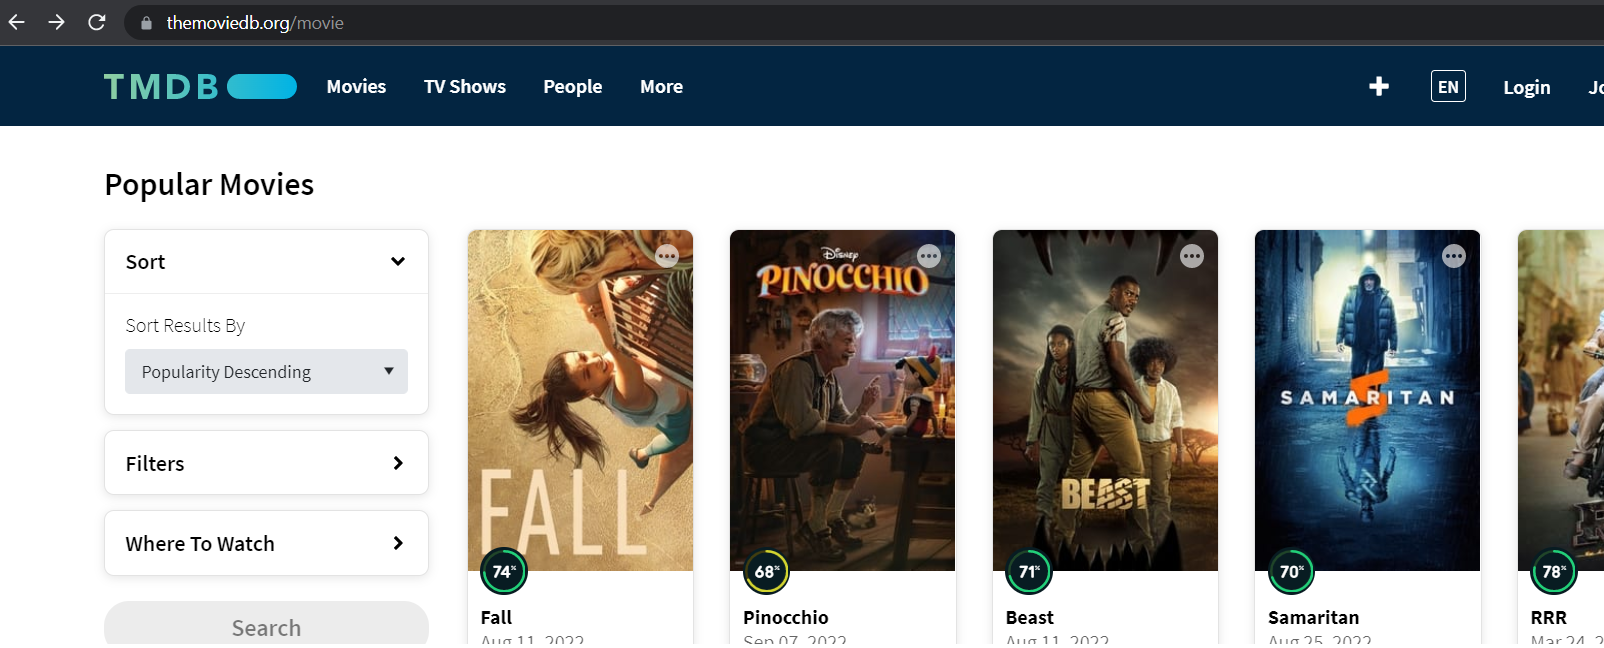


In [ ]:
movie_date_tags, movie_a_tags=get_tags(movie_doc)
movie_a_tags[0]['title']

'Orphan: First Kill'

# Scrape individual Movie or TV Show URL 

for additional Data like:

a. Genres
b. Runtime
c. User_like_percentage
d. Original Language
e. Network URL
f. Writers
g. Writers URL
h. Cast Members

i. `current season`
j. `number of episodes in current season`


**PLEASE NOTE** 

For Movies Pages last two columns of data will be:

k `budget`
l `revenue`

Instead of current season and number of episodes in current season.

Rest all the features from Genres till Cast are same for either Movie or TV Show.


Top of the Individual TV Show Page looks like:
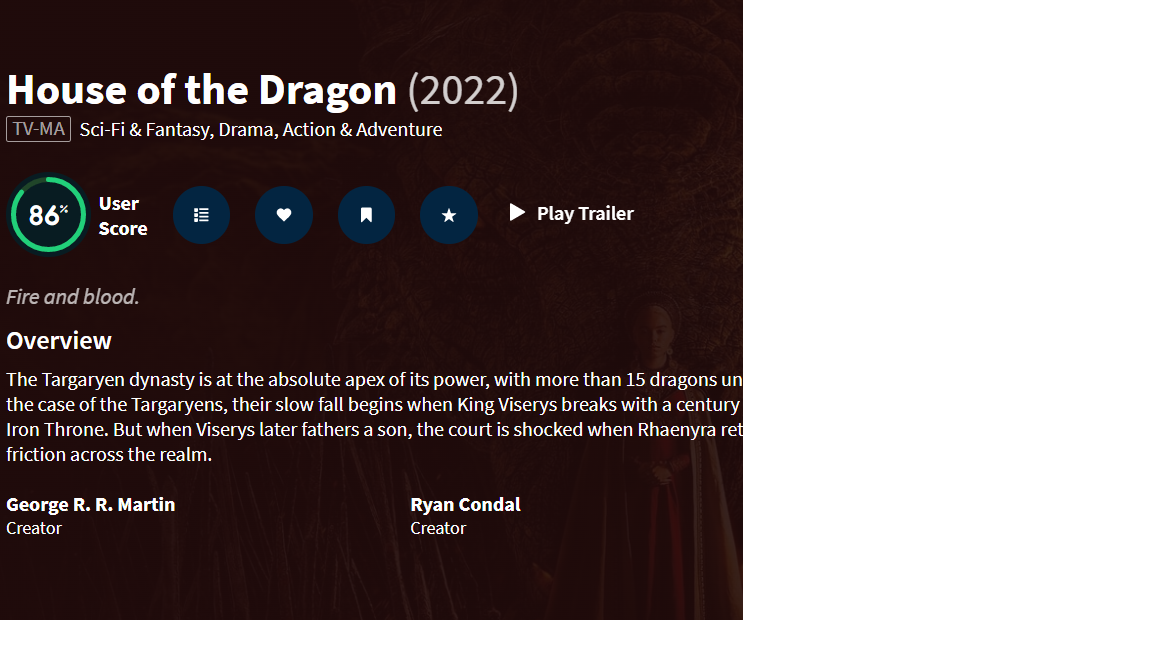

There are a number of of individual functions we write to extract required information about the show using its BS document we get using get_page(url).

Function `get_genres(doc)` returns the list of the genres for specific show/movie if present. We will pass in the individual movie or TV Show's parsed document to get_genres. 

It will return the list of genres that are displayed for it like Action, Comedy, Adventure, Drama, Fantasy etc.

A movie or show can has either one genre or many or sometimes it's not displayed in which case it returns None.

Function `run_duration(doc)` the time duration of the movie or one episode of the TV Show or None if the duration is not specified. 

Note that it's important to check the run_tag in `if else` loop because in many cases the values were missing and the function will return error. 


In [ ]:
## Following are number of individual functions we write to extract required information about the show using its BS document we get using get_page(show_url).

#  Function get_genres(show_doc) returns the list of Genres if present. 

def get_genres(doc):
    genre_tags=doc.find('span',class_='genres').find_all('a')

    # genre_tags contains a number of genres for the movie so we use list comprehension to generate the list of genres.
    genres=[i.string.strip() for i in genre_tags]
    if not genres:
        return None
    else:
        return genres

#  Function to fetch Running Duration of a movie or episode of show. The function takes in the parsed BS document for the individual movie or show.

def get_run_duration(doc):
    run_tag=doc.find_all('span',class_='runtime')

    # Check if the run_tag is present. Else we will return None.
    
    if run_tag:
        run_time=run_tag[0].string.strip()
    else:
        run_time=None
    return run_time


Let's test these two functions now. We will use the url of the first a_tag and pass it to the get_page function to retrieve parsed document.


In [ ]:
# Using first a_tag from the list of 20 a_tags we, can get show_url_0 which will be the link for the webpage which displays information about the individual show or movie.
title_show_0, show_url_0 = get_title_url(a_tags[0])

# Using this show_url_0 as input to get_page funciton, we retrieve the Beautiful Soup Document.
show_doc_0=get_page(show_url_0)

# We pass this show_doc_0 to the get_genres and run_duration functions to get the genres and duration of the movie or the show. 
# In this case we are using the first TV Show document which is House of the Dragon. 



In [ ]:
show_genres_0=get_genres(show_doc_0)
show_genres_0

['Drama', 'Crime']

In [ ]:
show_runtime_0= get_run_duration(show_doc_0)
print(show_runtime_0)

None


As we can see the genres and runtime as None for TV Show House of the Dragon. Run time is not mentioned and hence we get None. Lets check these values for the first movie i.e. "Fall" whose url can be fetched using first movie_a_tags from movie_doc. 

In [ ]:
movie_title_0, movie_url_0= get_title_url(movie_a_tags[0])

movie_doc_0=get_page(movie_url_0)

movie_genres_0=get_genres(movie_doc_0)

movie_genres_0


['Horror', 'Thriller']

In [ ]:
movie_runtime_0=get_run_duration(movie_doc_0)
movie_runtime_0

'1h 39m'

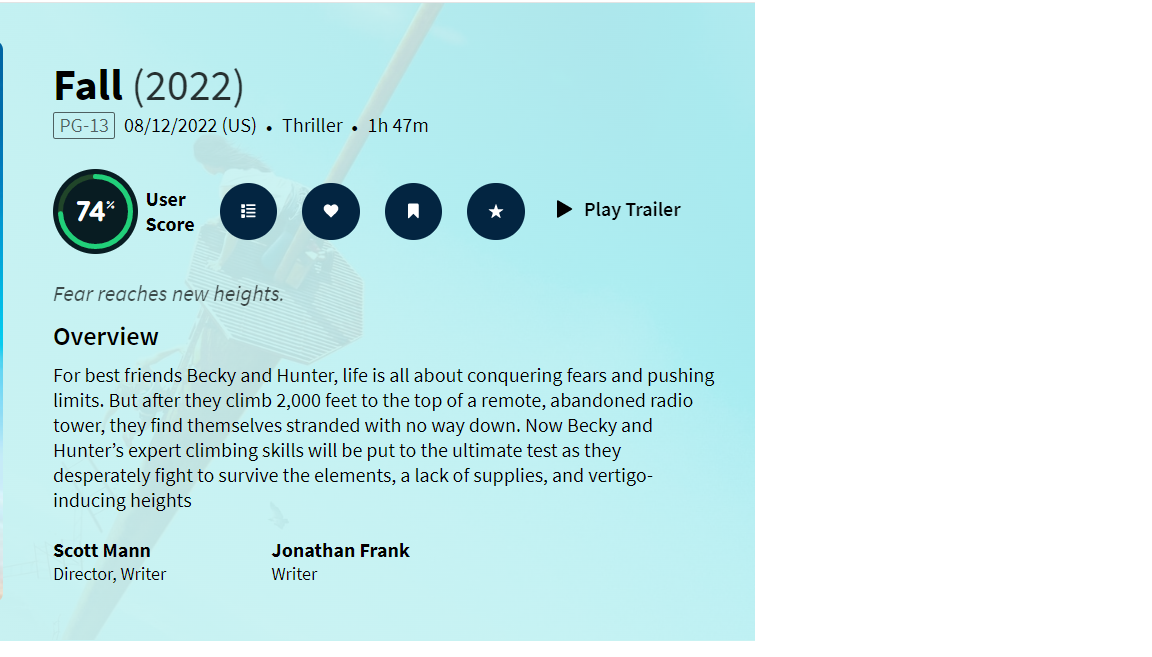

After the `genres` and `run_duration` of the movie or the show, now we will write functions to get the user like percentage and the main_characters of the movie or the show. user_like_percentage can be retrieved using 'data-percent' attribure. For main characters we will write a function `get_main_characters`

In [ ]:
user_like_percent=movie_doc_0.find(class_='user_score_chart')['data-percent'].strip()
user_like_percent

'69.0'

In [ ]:
show_user_like_percent=show_doc_0.find(class_='user_score_chart')['data-percent'].strip()
show_user_like_percent

'83.0'

Main Characters in movie or TV show displayed on web page vary from creator, director, writer or screenplay writer etc. So, we will scraping the name and character that is being displayed and combining the name and character together. We will return all the names and their character in a list. 

In [ ]:
def get_main_characters(doc):
    tags=doc.find_all('li',class_='profile')
    
    main_characters=[]
    for i in range(len(tags)):
        name = tags[i].a.string.strip()
        character =tags[i].find(class_='character').string.strip()
        x = name + " - " + character
        main_characters.append(x)

    return main_characters
    

Check the output of function `main_characters` for the first movie and TV Show.

In [ ]:
characters_movie=get_main_characters(movie_doc_0)
characters_movie

['Alex Mace - Characters, Story',
 'William Brent Bell - Director',
 'David Coggeshall - Screenplay',
 'David Leslie Johnson-McGoldrick - Story']

In [ ]:
show_characters= get_main_characters(show_doc_0)
show_characters

['Ryan Murphy - Creator', 'Ian Brennan - Creator']

The function to get original language of the TV Show is get_lang(doc). This function is different for Movie because in case of Movie Webpages the same tag contains information about the budget and revenue of the Movie along with language which are important and relevant for the Movie. 

The TV Show Pages do not contain tags for Budget and revenue, hence we will check if the tag contains Original_Language and function will return the language of the show which can be English, Hindi, Chinese or Korean or None if not specified.

In [ ]:
# Function to fetch Original Language for a particular TV show if present

def get_lang(doc):
    net_lang_tags=doc.find('section',class_='facts left_column')
    p_tags=net_lang_tags.find_all('p')

    # One of the p_tags contains information about the language of the show
    # We are checking each of the tags in p_tags.

    Original_language =None

    for tag in p_tags:
        # Original Language if present is contained in tag `bdi` within tag `strong` of the p_tag being checked.
        if tag.strong.bdi:

            if tag.strong.bdi.string.strip()=='Original Language':
                Original_language=tag.contents[1].strip()

    return Original_language


In [ ]:
# Lets check the function for our First TV Show "House of the Dragon"  whose parsed BS doc is show_doc_0.

Original_language = get_lang(show_doc_0)
Original_language

'English'

Function to get the Original language, Budget and Revenue for a movie is get_lang_budget_revenue(doc).

In [ ]:
# Function to get the Original language, budget and revenue of a movie.

def get_lang_budget_revenue(doc):
    net_lang_tags=doc.find('section',class_='facts left_column')
    p_tags=net_lang_tags.find_all('p')
    # p_tags  has many tags and we will identify the tags containing information about the language, budget and revenue of the Movie.
    # We are checking each of the tags in p_tags.

    Original_language=None
    Budget=None
    Revenue=None


    for tag in p_tags:

        # Original Language/Budget/Revenue if present is contained in tag `bdi` within tag `strong` of the p_tag being checked.

        if tag.strong.bdi:
          # We will check whether the string in tag.strong.bdi is 'Original Language or 'Budget' or 'Revenue'. 

            if tag.strong.bdi.string.strip()=='Original Language':
                Original_language=tag.contents[1].strip() # Collect the value in tag.contents[1]

            elif tag.strong.bdi.string.strip()=='Budget':
                Budget=tag.contents[1].strip() # Collect the value in tag.contents[1]

            elif tag.strong.bdi.string.strip()=='Revenue':
                Revenue=tag.contents[1].strip() # Collect the value in tag.contents[1]
  
    return Original_language,Budget,Revenue
        



In [ ]:
# Lets check the function for movie_doc_0
Original_language, budget, revenue = get_lang_budget_revenue(movie_doc_0)
Original_language, budget, revenue



('English', '-', '$9,572,765.00')

The function to get the cast of the TV Show or Movie is get_cast(doc). 
This takes in the individual show or movie doc parsed using BS. It returns the list of top of Series Cast for TV Shows or Top Billed Cast for Movie whichever is chosen.



In [ ]:
def get_cast(doc):
  # cast tags are part of ol tags and class is people scroller. 
    cast_tags=doc.find_all('ol',class_='people scroller')
    
    if cast_tags:
        # Find img tags within cast_tags.
        
        cast=cast_tags[0].find_all('img')
        # We use list comprehension to collect name of character from alt attributes.
        cast_members=[i['alt'].strip() for i in cast]
    else:
        cast_members = None # if cast_tags are not present, we return None.
    return cast_members


Using the get_cast function we will retrieve the list of cast_members of First TV Show i.e. 'House of the Dragon' and first movie i.e. 'Fall'.

In [ ]:
show_cast =get_cast(show_doc_0)
show_cast

['Evan Peters as Jeffrey Dahmer',
 'Richard Jenkins as Lionel Dahmer',
 'Molly Ringwald as Shari Dahmer',
 'Niecy Nash as Glenda Cleveland',
 'Michael Learned as Catherine Dahmer',
 'Colby French as Patrick Kennedy',
 'Michael Beach as Det. Murphy',
 'Karen Malina White as Shirley Hughes',
 'Rodney Burford as Tony Hughes']

Note the name of the character being portrayed by the cast members in TV Show. Like Actor Paddy  Considine's character in the TV Show is Viserys Targaryen.

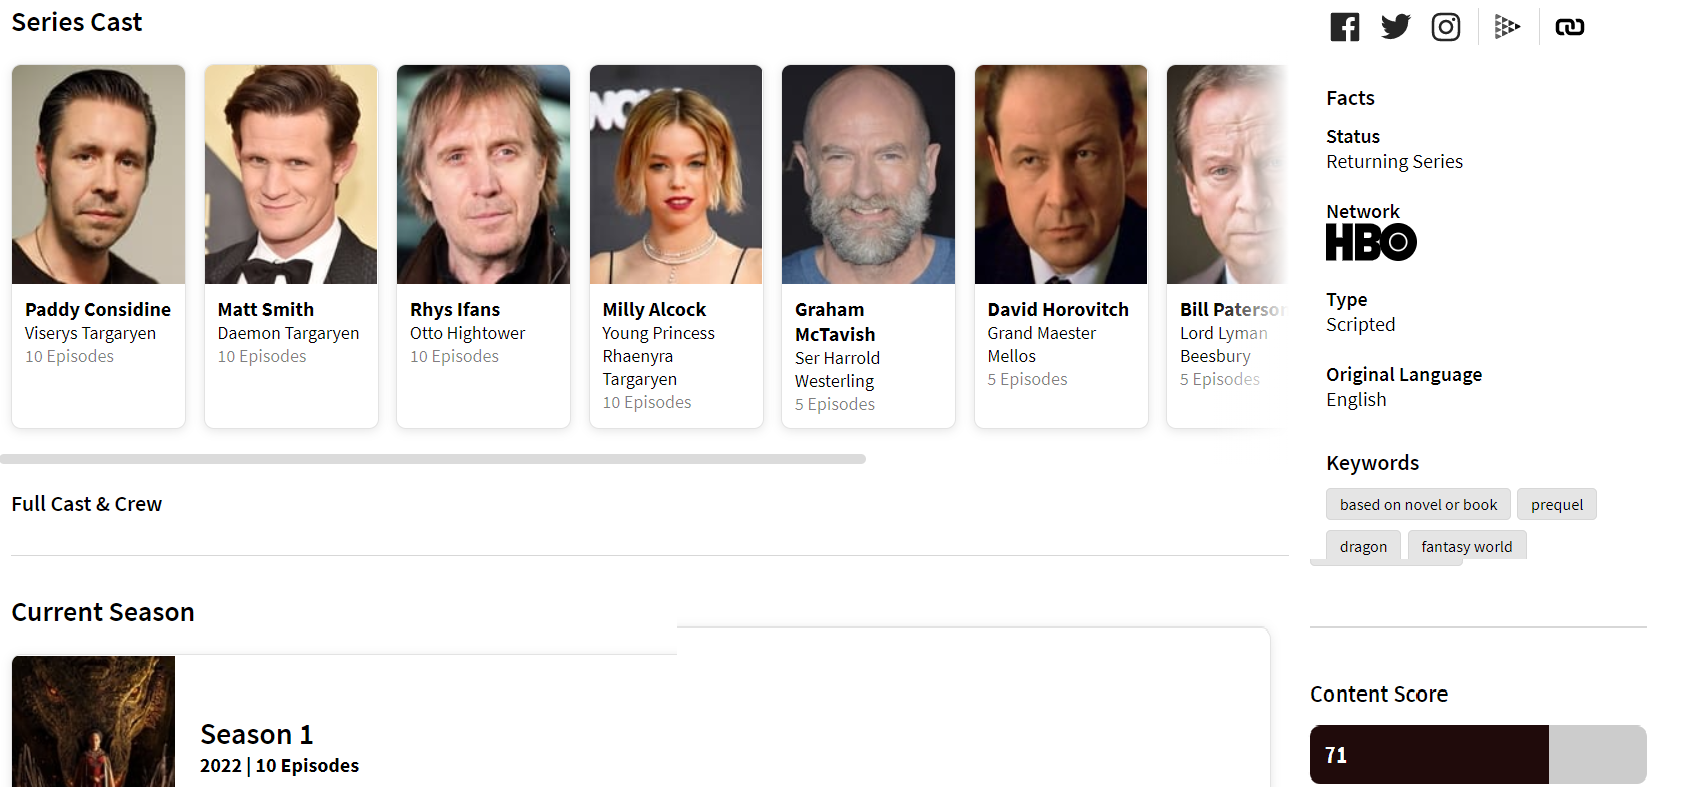

In [ ]:
movie_cast = get_cast(movie_doc_0)
movie_cast

['Grace Caroline Currey',
 'Virginia Gardner',
 'Jeffrey Dean Morgan',
 'Mason Gooding',
 'Jasper Cole',
 'Darrell Dennis',
 'Julia Pace Mitchell']

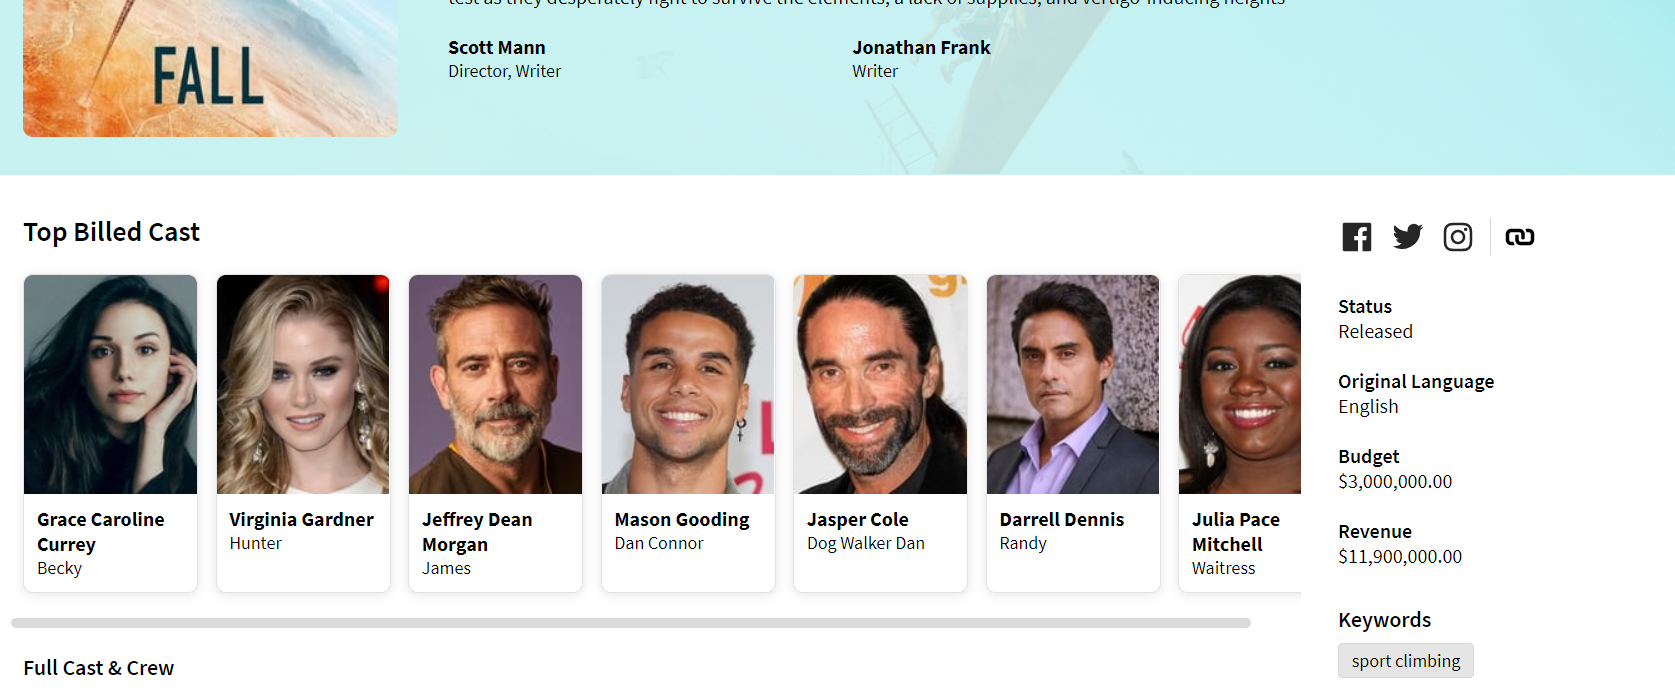

We will write one more function for TV Shows to extract data about their current season and number of episodes in current season. Function is get_season_spisodes(doc)

In [ ]:
# Function to fetch Current Season and Number of Episodes in Current Season of the show if present 

def get_season_episodes(doc):
    # season tag is in div tag  of class attribute 'flex'
    season_tag=doc.find_all('div', class_='flex')
    # a tag which is part of h2 tag in season tag contains current season.
    cur_season=season_tag[1].h2.a
    if cur_season:
        cur_season=cur_season.string.strip()
    else:
        cur_season=None
    # number of episodes are part of h4 tag within season tag. 
    num_episodes=season_tag[1].h4
    if num_episodes:
      # num_episodes also contain year and "|" symbol which we are splitting and selecting only num_episodes.
        num_episodes=num_episodes.string.split(' ')[2]
    else:
        num_episodes=None
    return cur_season, num_episodes
    

In [ ]:
show_current_season, num_episodes_current_season = get_season_episodes(show_doc_0)

show_current_season, num_episodes_current_season


('Season 1', '10')

We are done with writting fucntions for extracting whatever data we need from the Web Page. 

# Fetch the data for one movie or show in a dictionary

Now we will write a function which takes in the date and a tags from the main Web Page and collects all the required data for a particular TV Show in one dictionary. The created dictionary will be returned.

In [ ]:
# Function collects the complete information of an individual Show and returns the dictionary.

def fetch_show_data(date_tag,a_tag):

    # Collect Release Date from the main_page
    date=get_release_date(date_tag)
   
    # collect title and url of TV Show from main_page.
    title,url=get_title_url(a_tag)

    # Creates BS parsed document for individual TV Show using the url extracted by a_tag
    doc =get_page(url)

    # Using doc we will extract genres, run_duration, user_like_percent, Original language, current_season, num_episodes, main_characters and cast_of_show

    genres = get_genres(doc)

    run_duration = get_run_duration(doc)

    user_like_percent=doc.find(class_='user_score_chart')['data-percent'].strip()

    original_language = get_lang(doc)

    current_season, num_episodes=get_season_episodes(doc)

    main_characters = get_main_characters(doc)

    cast = get_cast(doc)

    return {'release_date':date,
            'show_title':title,
            'show_url':url,
            'genres':genres,
            'run_duration':run_duration,
            'user_like_percentage':user_like_percent,
            'original_language':original_language,
            'current_season':current_season,
            'num_episodes_current_season':num_episodes,
            'main_characters':main_characters,
            'cast_of_show':cast
           }  


Lets check the return values of function fetch_show_data for a specific show like "House of the Dragon'.

In [ ]:
fetch_show_data(date_tags[0], a_tags[0])

{'release_date': 'Aug 21, 2022',
 'show_title': 'House of the Dragon',
 'show_url': 'https://www.themoviedb.org/tv/94997',
 'genres': ['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure'],
 'run_duration': None,
 'user_like_percentage': '86.0',
 'original_language': 'English',
 'current_season': 'Season 1',
 'num_episodes_current_season': '10',
 'main_characters': ['George R. R. Martin - Creator', 'Ryan Condal - Creator'],
 'cast_of_show': ['Paddy Considine as Viserys Targaryen',
  'Matt Smith as Daemon Targaryen',
  'Rhys Ifans as Otto Hightower',
  'Graham McTavish as Ser Harrold Westerling',
  'David Horovitch as Grand Maester Mellos',
  'Bill Paterson as Lord Lyman Beesbury',
  'Gavin Spokes as Lord Lyonel Strong',
  'Steffan Rhodri as Lord Hobert Hightower',
  'Jefferson Hall as Lord Jason Lannister / Ser Tyland Lannister']}

For Movies we will write similar function fetch_movie_data and fetch the details of first movie 'Fall'.

In [ ]:
# Function collects the complete information of a Movie and returns the dictionary.

def fetch_movie_data(date_tag,a_tag):

    # Collect Release Date from the main_page
    date=get_release_date(date_tag)
   
    # collect title and url of TV Show from main_page.
    title,url=get_title_url(a_tag)

    # Creates BS parsed document for individual TV Show using the url extracted by a_tag
    doc =get_page(url)

    # Using doc we will extract genres, run_duration, user_like_percent, Original language, Budget,Revenue, main_characters and cast_of_show

    genres = get_genres(doc)

    run_duration = get_run_duration(doc)

    user_like_percent=doc.find(class_='user_score_chart')['data-percent'].strip()

    original_language, budget, revenue = get_lang_budget_revenue(doc)

    main_characters = get_main_characters(doc)

    cast = get_cast(doc)

    return {'release_date':date,
            'movie_title':title,
            'movie_url':url,
            'genres':genres,
            'run_duration':run_duration,
            'user_like_percentage':user_like_percent,
            'original_language':original_language,
            'budget':budget,
            'revenue':revenue,
            'main_characters':main_characters,
            'cast_of_movie':cast
           }  


In [ ]:
fetch_movie_data(movie_date_tags[0], movie_a_tags[0])

{'release_date': 'Aug 11, 2022',
 'movie_title': 'Fall',
 'movie_url': 'https://www.themoviedb.org/movie/985939',
 'genres': ['Thriller'],
 'run_duration': '1h 47m',
 'user_like_percentage': '75.0',
 'original_language': 'English',
 'budget': '$3,000,000.00',
 'revenue': '$11,900,000.00',
 'main_characters': ['Scott Mann - Director, Writer',
  'Jonathan Frank - Writer'],
 'cast_of_movie': ['Grace Caroline Currey',
  'Virginia Gardner',
  'Jeffrey Dean Morgan',
  'Mason Gooding',
  'Jasper Cole',
  'Darrell Dennis',
  'Julia Pace Mitchell']}

# Collect the dictionary data in lists
The functions like fetch_show_data or fetch_movie_data allows us to collect the data from a particular TV Show or Movie in a dictionary. 

But there are 20 such TV Shows and movies which are listed on one page. We have their date and a tags. Using them we will generate a list of such dictionaries. Moreover, there is a Load More button which allows us to browse through pages of TMDB. Once we add page number information in the url like "https://www.themoviedb.org/movie?page=3" it allows us to view 20 movies listed on page number 3. 

We will write functions where we can generate a list of individual data dictionaries from either TV Shows or Movies. We will write two functions which can scrape either TV Shows or Movie Pages. We can specify the starting page number and number of pages for which we will scrape data.

In [ ]:
# Function can scrape data from any starting page and number of pages after that.
# List of individual show data which are listed in those number of pages is returned.
# If number of pages is 1: list contains 20 dictionaries corresponding to 20 TV Shows. whereas if number is 2 then list will have 40 dictionaries and so on.

def scrape_popular_tvshows(start_page, num_of_pages=1):
  show_data=[]
  last_page=start_page+num_of_pages
  in_url=base_url +"/tv" # URL for Popular TV Shows WebPage on TMDB
  # we will scrape pages between the range start_page for a given number of pages.

  for i in range(start_page,last_page):
      
    url= in_url + "?page={}".format(i)
    # Get BS document using get_page function.
    doc = get_page(url)
    
    print('scraping page {} :- {}'.format(i, url))
    # collecting date and a tags for 20 shows on one web page

    date_tags,a_tags =get_tags(doc)
    
    for date, a in zip(date_tags,a_tags):
      # to slow the scraping of Web Page from a WebSite we are using sleep function. 
      time.sleep(random.randint(5,10))
      show_data.append(fetch_show_data(date,a)) # fetch individual show_data and appends it to the list.
    time.sleep(random.randint(30,45))
  print("Data fetched for {} number of shows from {} number of pages.".format(len(show_data), num_of_pages))
  return show_data

  
# Function can scrape data from any starting page and number of pages after that.
# List of individual movie data which are listed in those number of pages is returned.
# If number of pages is 1: list contains 20 dictionaries corresponding to 20 Movies. 


def scrape_popular_movies(start_page, num_of_pages=1):
    in_url=base_url +"/movie" # URL for Popular Movies WebPage on TMDB
    movie_data=[]
    last_page=start_page+num_of_pages
    # we will scrape pages between the range start_page for a given number of pages.
    for i in range(start_page,last_page):
      url= in_url + "?page={}".format(i)
      # Get BS document using get_page function.
      doc = get_page(url)
      
      print('scraping page {} :- {}'.format(i, url))
      # collecting date and a tags for 20 movies on one web page
      date_tags,a_tags =get_tags(doc)
      
      for date, a in zip(date_tags,a_tags):
        # to slow the scraping of Web Page from a WebSite we are using sleep function. 
          time.sleep(random.randint(5,10))
          movie_data.append(fetch_movie_data(date,a)) # fetch individual movie_data and appends it to the list.
      time.sleep(random.randint(30,45))
    print("Data fetched for {} number of Movies from {} number of pages.".format(len(movie_data), num_of_pages))
    return movie_data

  

In [ ]:
tv_show_data = scrape_popular_tvshows(1, 5)

scraping page 1 :- https://www.themoviedb.org/tv?page=1
scraping page 2 :- https://www.themoviedb.org/tv?page=2
scraping page 3 :- https://www.themoviedb.org/tv?page=3
scraping page 4 :- https://www.themoviedb.org/tv?page=4
scraping page 5 :- https://www.themoviedb.org/tv?page=5
Data fetched for 100 number of shows from 5 number of pages.


tv_show_data is a list of all the TV Shows which are listed on first five pages of Website TMDB. Lets check some of the information and then write them to a Pandas Dataframe. 

In [ ]:
tv_show_data[:3]

[{'release_date': 'Aug 21, 2022',
  'show_title': 'House of the Dragon',
  'show_url': 'https://www.themoviedb.org/tv/94997',
  'genres': ['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure'],
  'run_duration': None,
  'user_like_percentage': '86.0',
  'original_language': 'English',
  'current_season': 'Season 1',
  'num_episodes_current_season': '10',
  'main_characters': ['George R. R. Martin - Creator',
   'Ryan Condal - Creator'],
  'cast_of_show': ['Paddy Considine as Viserys Targaryen',
   'Matt Smith as Daemon Targaryen',
   'Rhys Ifans as Otto Hightower',
   'Graham McTavish as Ser Harrold Westerling',
   'David Horovitch as Grand Maester Mellos',
   'Bill Paterson as Lord Lyman Beesbury',
   'Gavin Spokes as Lord Lyonel Strong',
   'Steffan Rhodri as Lord Hobert Hightower',
   'Jefferson Hall as Lord Jason Lannister / Ser Tyland Lannister']},
 {'release_date': 'Sep 01, 2022',
  'show_title': 'The Lord of the Rings: The Rings of Power',
  'show_url': 'https://www.themoviedb.org/

In [ ]:
tv_show_data[-1]

{'release_date': 'Feb 03, 2022',
 'show_title': 'Reacher',
 'show_url': 'https://www.themoviedb.org/tv/108978',
 'genres': ['Action & Adventure', 'Crime', 'Drama'],
 'run_duration': '49m',
 'user_like_percentage': '82.0',
 'original_language': 'English',
 'current_season': 'Season 1',
 'num_episodes_current_season': '8',
 'main_characters': ['Nick Santora - Creator'],
 'cast_of_show': ['Alan Ritchson as Jack Reacher',
  'Malcolm Goodwin as Oscar Finlay',
  'Willa Fitzgerald as Roscoe Conklin',
  'Chris Webster as KJ',
  'Bruce McGill as Mayor Teale',
  'Maria Sten as Frances Neagley',
  'Hugh Thompson as Officer Baker',
  'Maxwell Jenkins as Young Reacher',
  'Gavin White as Young Joe']}

We can compare the information fetched using our functions with the actual show details on Web Page. Lets check it for the last TV Show displayed on page 5 at link("https://www.themoviedb.org/tv?page=5")

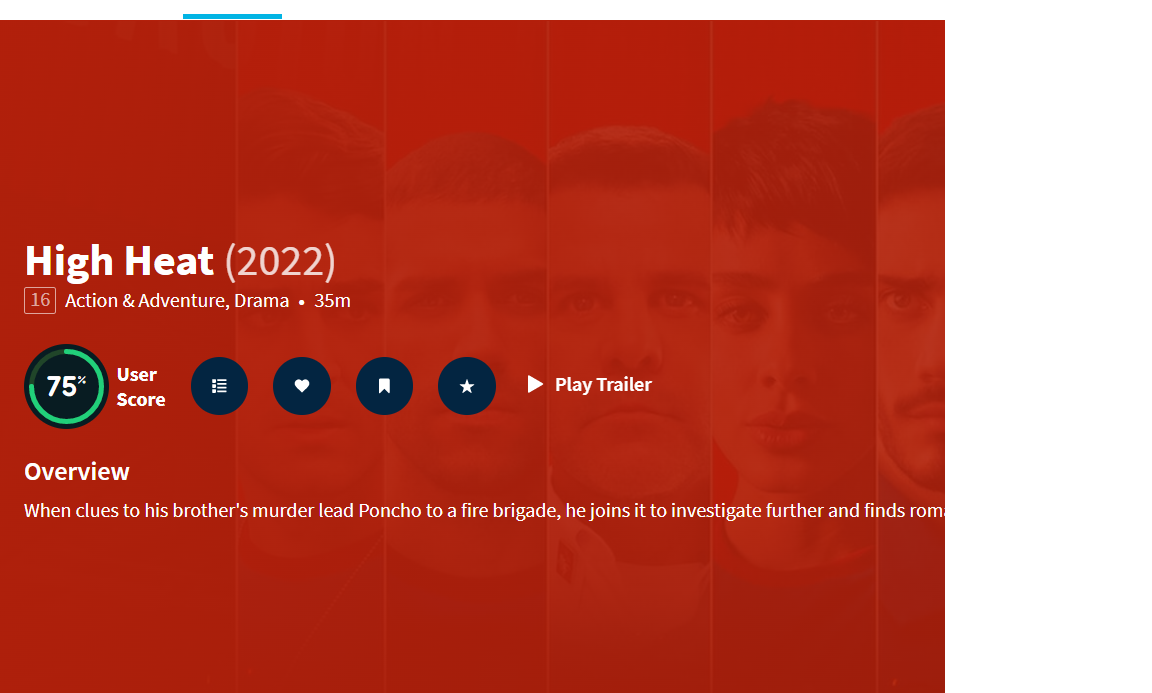

# Create Dataframes using the Lists

In [ ]:
popular_tv_show_df = pd.DataFrame.from_dict(tv_show_data, orient='columns')
popular_tv_show_df

release_date                                 show_title  \
0   Aug 21, 2022                        House of the Dragon   
1   Sep 01, 2022  The Lord of the Rings: The Rings of Power   
2   Aug 18, 2022                  She-Hulk: Attorney at Law   
3   May 02, 2018                                  Cobra Kai   
4   Dec 02, 2013                             Rick and Morty   
..           ...                                        ...   
95  Oct 05, 2015                              One-Punch Man   
96  Sep 22, 1994                                    Friends   
97  May 30, 2022                            Love in 40 Days   
98  Mar 14, 2016                                   Soy Luna   
99  Feb 03, 2022                                    Reacher   

                                show_url  \
0    https://www.themoviedb.org/tv/94997   
1    https://www.themoviedb.org/tv/84773   
2    https://www.themoviedb.org/tv/92783   
3    https://www.themoviedb.org/tv/77169   
4    https://www.themoviedb.org/tv/60625   
..                                   ...   
95   https://www.themoviedb.org/tv/63926   
96    https://www.themoviedb.org/tv/1668   
97  https://www.themoviedb.org/tv/152296   
98   https://www.themoviedb.org/tv/66203   
99  https://www.themoviedb.org/tv/108978   

                                               genres run_duration  \
0       [Sci-Fi & Fantasy, Drama, Action & Adventure]         None   
1       [Sci-Fi & Fantasy, Action & Adventure, Drama]           1h   
2                          [Comedy, Sci-Fi & Fantasy]          38m   
3                 [Action & Adventure, Drama, Comedy]          30m   
4   [Animation, Comedy, Sci-Fi & Fantasy, Action &...          22m   
..                                                ...          ...   
95            [Action & Adventure, Animation, Comedy]          24m   
96                                    [Comedy, Drama]          25m   
97                         [Comedy, Sci-Fi & Fantasy]          30m   
98                                       [Soap, Kids]          45m   
99                 [Action & Adventure, Crime, Drama]          49m   

   user_like_percentage   original_language current_season  \
0                  86.0             English       Season 1   
1                  77.0             English       Season 1   
2                  72.0             English     Miniseries   
3                  82.0             English       Season 5   
4                  87.0             English       Season 6   
..                  ...                 ...            ...   
95                 84.0            Japanese       Season 2   
96                 85.0             English      Season 10   
97                 39.0             Tagalog       Season 1   
98                 80.0  Spanish; Castilian       Season 3   
99                 82.0             English       Season 1   

   num_episodes_current_season  \
0                           10   
1                            8   
2                            9   
3                           10   
4                           10   
..                         ...   
95                          12   
96                          18   
97                          90   
98                          60   
99                           8   

                                      main_characters  \
0   [George R. R. Martin - Creator, Ryan Condal - ...   
1   [John D. Payne - Creator, Patrick McKay - Crea...   
2                             [Jessica Gao - Creator]   
3   [Hayden Schlossberg - Creator, Josh Heald - Cr...   
4    [Dan Harmon - Creator, Justin Roiland - Creator]   
..                                                ...   
95                                                 []   
96  [Marta Kauffman - Creator, David Crane - Creator]   
97                                                 []   
98  [Karol Sevilla - Creator, Jorge Edelstein - Cr...   
99                           [Nick Santora - Creator]   

                                      

In [ ]:
popular_tv_show_df.describe()

release_date           show_title  \
count            100                  100   
unique            94                  100   
top     Apr 11, 2022  House of the Dragon   
freq               2                    1   

                                   show_url   genres run_duration  \
count                                   100       99           89   
unique                                  100       57           26   
top     https://www.themoviedb.org/tv/94997  [Drama]          45m   
freq                                      1       12           13   

       user_like_percentage original_language current_season  \
count                   100               100            100   
unique                   31                11             29   
top                    82.0           English       Season 1   
freq                     11                63             37   

       num_episodes_current_season main_characters  \
count                          100             100   
unique                          40              75   
top                             10              []   
freq                            14              22   

                                             cast_of_show  
count                                                  98  
unique                                                 98  
top     [Paddy Considine as Viserys Targaryen, Matt Sm...  
freq                                                    1

In [ ]:
movie_data=scrape_popular_movies(1,10)

scraping page 1 :- https://www.themoviedb.org/movie?page=1
scraping page 2 :- https://www.themoviedb.org/movie?page=2
scraping page 3 :- https://www.themoviedb.org/movie?page=3
scraping page 4 :- https://www.themoviedb.org/movie?page=4
scraping page 5 :- https://www.themoviedb.org/movie?page=5
scraping page 6 :- https://www.themoviedb.org/movie?page=6
scraping page 7 :- https://www.themoviedb.org/movie?page=7
scraping page 8 :- https://www.themoviedb.org/movie?page=8
scraping page 9 :- https://www.themoviedb.org/movie?page=9
scraping page 10 :- https://www.themoviedb.org/movie?page=10
Data fetched for 200 number of Movies from 10 number of pages.


movie_data is a list of all the 200 Popular Movies which are listed on first ten pages of Website TMDB. Lets check some of the information and then write them to a Pandas Dataframe.

In [ ]:
movie_data[:3]

[{'release_date': 'Aug 11, 2022',
  'show_title': 'Fall',
  'show_url': 'https://www.themoviedb.org/movie/985939',
  'genres': ['Thriller'],
  'run_duration': '1h 47m',
  'user_like_percentage': '75.0',
  'original_language': 'English',
  'budget': '$3,000,000.00',
  'revenue': '$11,900,000.00',
  'main_characters': ['Scott Mann - Director, Writer',
   'Jonathan Frank - Writer'],
  'cast_of_movie': ['Grace Caroline Currey',
   'Virginia Gardner',
   'Jeffrey Dean Morgan',
   'Mason Gooding',
   'Jasper Cole',
   'Darrell Dennis',
   'Julia Pace Mitchell']},
 {'release_date': 'Sep 07, 2022',
  'show_title': 'Pinocchio',
  'show_url': 'https://www.themoviedb.org/movie/532639',
  'genres': ['Fantasy', 'Adventure', 'Family'],
  'run_duration': '1h 45m',
  'user_like_percentage': '68.0',
  'original_language': 'English',
  'budget': '-',
  'revenue': '-',
  'main_characters': ['Robert Zemeckis - Director, Screenplay',
   'Chris Weitz - Screenplay'],
  'cast_of_movie': ['Benjamin Evan Ainswo

In [ ]:
movie_data[-1]

{'release_date': 'Nov 16, 2005',
 'show_title': 'Harry Potter and the Goblet of Fire',
 'show_url': 'https://www.themoviedb.org/movie/674',
 'genres': ['Adventure', 'Fantasy', 'Family'],
 'run_duration': '2h 37m',
 'user_like_percentage': '78.0',
 'original_language': 'English',
 'budget': '$150,000,000.00',
 'revenue': '$895,921,036.00',
 'main_characters': ['Mike Newell - Director',
  'J.K. Rowling - Novel',
  'Steve Kloves - Screenplay'],
 'cast_of_movie': ['Daniel Radcliffe',
  'Rupert Grint',
  'Emma Watson',
  'Robbie Coltrane',
  'Ralph Fiennes',
  'Michael Gambon',
  'Brendan Gleeson',
  'Jason Isaacs',
  'Gary Oldman']}

We can compare the information fetched using our functions with the actual movie details on Web Page. Lets check it for the last movie displayed on page 10 at link("https://www.themoviedb.org/tv?page=5"). This will help us validate the data. 

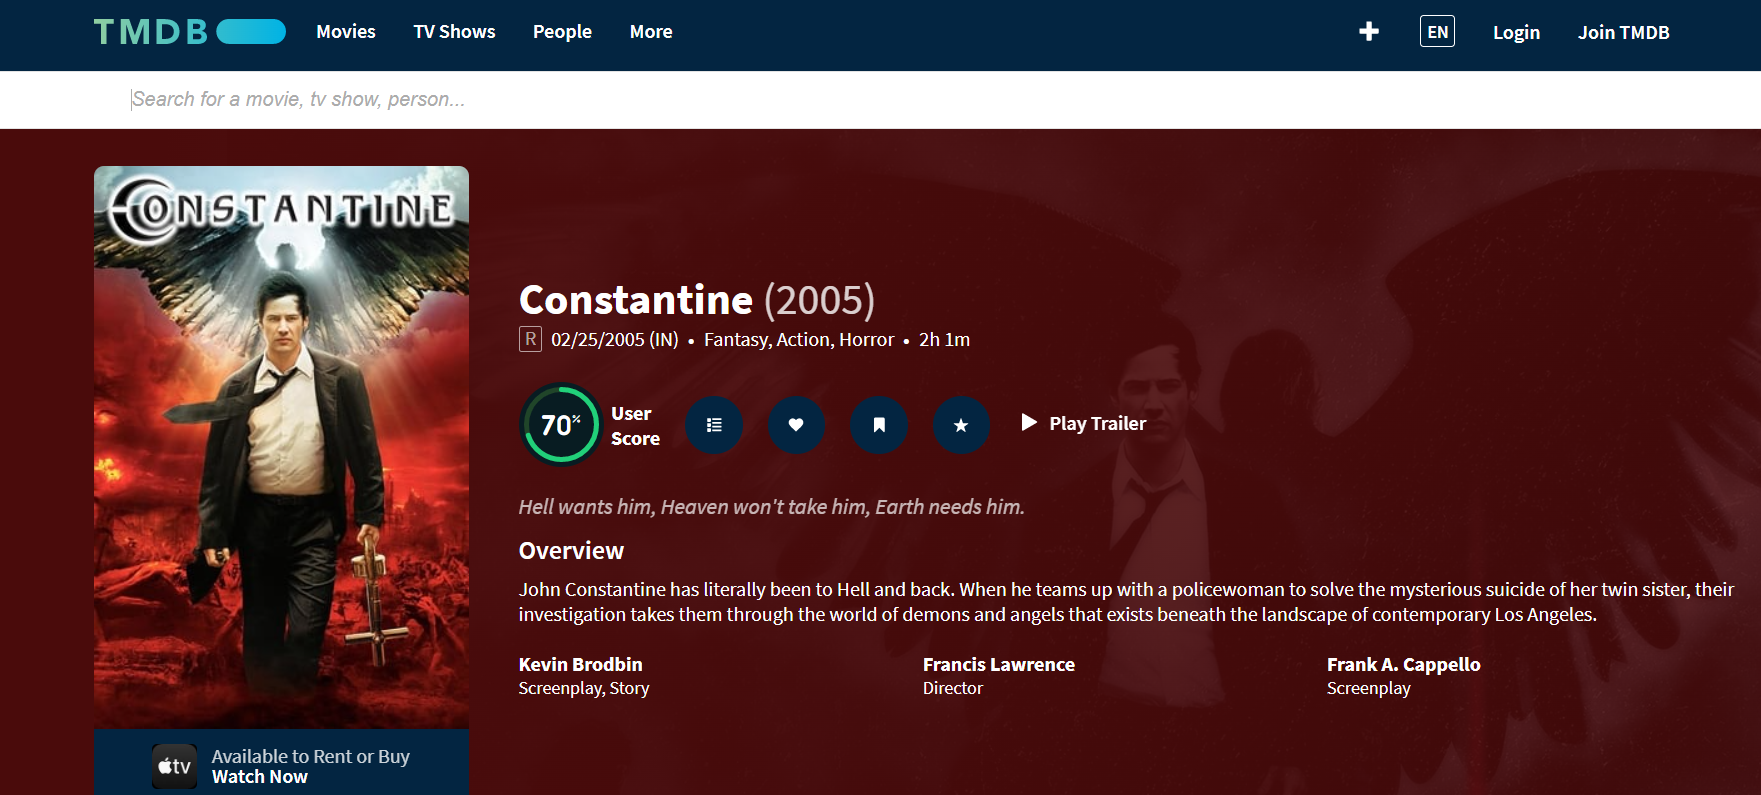

In [ ]:
popular_movies_df = pd.DataFrame.from_dict(movie_data, orient='columns')
popular_movies_df

release_date                                show_title  \
0    Aug 11, 2022                                      Fall   
1    Sep 07, 2022                                 Pinocchio   
2    Jul 27, 2022                        Orphan: First Kill   
3    Aug 11, 2022                                     Beast   
4    Aug 25, 2022                                 Samaritan   
..            ...                                       ...   
195  Jun 17, 2022                                First Love   
196  Feb 14, 2022                                    Bubble   
197  Nov 16, 2001  Harry Potter and the Philosopher's Stone   
198  Jul 15, 2022                                  She Will   
199  Nov 16, 2005       Harry Potter and the Goblet of Fire   

                                    show_url  \
0    https://www.themoviedb.org/movie/985939   
1    https://www.themoviedb.org/movie/532639   
2    https://www.themoviedb.org/movie/760161   
3    https://www.themoviedb.org/movie/760741   
4    https://www.themoviedb.org/movie/629176   
..                                       ...   
195  https://www.themoviedb.org/movie/834742   
196  https://www.themoviedb.org/movie/912598   
197     https://www.themoviedb.org/movie/671   
198  https://www.themoviedb.org/movie/852485   
199     https://www.themoviedb.org/movie/674   

                                      genres run_duration  \
0                                 [Thriller]       1h 47m   
1               [Fantasy, Adventure, Family]       1h 45m   
2                         [Horror, Thriller]       1h 39m   
3                 [Adventure, Drama, Horror]       1h 33m   
4           [Action, Drama, Science Fiction]       1h 42m   
..                                       ...          ...   
195                         [Romance, Drama]       1h 35m   
196  [Animation, Adventure, Science Fiction]       1h 41m   
197                     [Adventure, Fantasy]       2h 32m   
198                [Thriller, Horror, Drama]       1h 35m   
199             [Adventure, Fantasy, Family]       2h 37m   

    user_like_percentage original_language           budget          revenue  \
0                   75.0           English    $3,000,000.00   $11,900,000.00   
1                   68.0           English                -                -   
2                   70.0           English                -    $9,572,765.00   
3                   71.0           English                -   $52,000,000.00   
4                   70.0           English  $100,000,000.00                -   
..                   ...               ...              ...              ...   
195                 62.0           English                -                -   
196                 75.0          Japanese                -                -   
197                 79.0           English  $125,000,000.00  $976,475,550.00   
198                 58.0           English                -       $40,958.00   
199                 78.0           English  $150,000,000.00  $895,921,036.00   

                                       main_characters  \
0    [Scott Mann - Director, Writer, Jonathan Frank...   
1    [Robert Zemeckis - Director, Screenplay, Chris...   
2    [Alex Mace - Characters, Story, William Brent ...   
3    [Baltasar Kormákur - Director, Ryan Engle - Sc...   
4      [Julius Avery - Director, Bragi Schut - Writer]   
..                                                 ...   
195                  [A.J. Edwards - Director, Writer]   
196  [Tetsuro Araki - Director, Naoko Sato - Screen...   
197  [Chris Columbus - Director, J.K. Rowling - Nov...   
198  [Charlotte Colbert - Director, Writer, Kitty P...   
199  [Mike Newell - Director, J.K. Rowling - Novel,...   

                                         cast_of_movie  
0    [Grace Caroline Currey, Virginia Gardner, Jeff...  
1    [Benjamin Evan Ainsworth, Tom Hanks, Joseph Go...  
2    [Isabelle Fuhrman, Julia Stiles, Rossif Suther...  
3    [Idris Elba, Leah Jeffries, Iyana Halley, Shar.

In [ ]:
popular_movies_df.describe()

release_date show_title                                 show_url  \
count            200        200                                      200   
unique           144        200                                      200   
top     Aug 10, 2022       Fall  https://www.themoviedb.org/movie/985939   
freq               6          1                                        1   

          genres run_duration user_like_percentage original_language budget  \
count        199          193                  200               200    200   
unique       124           79                   36                12     50   
top     [Horror]       1h 45m                 70.0           English      -   
freq           9           12                   14               149    125   

       revenue                      main_characters  \
count      200                                  200   
unique      86                                  192   
top          -  [Kirsten Lepore - Director, Writer]   
freq       115                                    4   

                                            cast_of_movie  
count                                                 197  
unique                                                197  
top     [Grace Caroline Currey, Virginia Gardner, Jeff...  
freq                                                    1

# Create csv Files

In [ ]:
popular_tv_show_df.to_csv('TMDB_popular_tvshows_100.csv', index=False)

In [ ]:

popular_movies_df.to_csv('TMDB_popular_movies_200.csv', index=False)



We have now created csv files using the dataframes popular_tv_show_df and popular_movies_df.

#Code Compilation

Following is a compilation of the code/functions we have written so far in this document for scraping TMDB WebPages for Popular TV Show or Popular Movies.

In [ ]:
# COMPLETE CODE/FUNCTIONS CREATED AND USED FOR THIS NOTEBOOK.

# 1. Get a Beautiful Soup document by downloading a url using requests and parsing the response through Beautiful Soup.

base_url = "https://www.themoviedb.org"
get_headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

in_url=base_url+"/tv"
def get_page(in_url):
    # get the Popular_TV_Show_url
    # Fetch page using requests library
    response =requests.get(in_url,headers=get_headers)
    # Check if the response is generated successfully else raise an exception.
    if response.status_code!=200:
        print("Status Code",response.status_code)
        raise Exception("Failed to fetch web page" + in_url)
    
    # Get a BeautifulSoup object by parsing the page through the BS
    
    doc = BeautifulSoup(response.text, 'html.parser')
    
    return doc

# 2. From the document get the date and a tags which help us to find the list of 20 show titles, URLs and its Release Dates on a prticular page.

def get_tags(doc):
     
    a_tags=doc.find_all('a',class_='image')
    
    date_tags=doc.find_all('div',class_='card style_1')
    
    if len(a_tags)!=len(date_tags):
        print("Mismatch in number of title and date tags.")
    return date_tags,a_tags
        
# 3. Using the date tag get the Release Date of the individual show

def get_release_date(date_tag): 

    date=date_tag.p.string.strip()
    return date
# 4. Using the a_tag get the title and the url of the individual show.

# Using this URL we will open the page for each show one by one and get additional information about a particular show

def get_title_url(a_tag):
    
    title=a_tag['title'].strip()
    url=base_url+a_tag['href'].strip()
    
    return title,url


# 5. Function get_genres(doc) returns the list of Genres if present. 
# It will return the list of genres that are displayed for it like Action, Comedy, Adventure, Faictiion, Fantasy etc.
# A movie or show can has either one genre or many or sometimes it's not displayed in which case it returns None.


def get_genres(doc):
    genre_tags=doc.find('span',class_='genres').find_all('a')

    # genre_tags contains a number of genres for the movie so we use list comprehension to generate the list of genres.
    genres=[i.string.strip() for i in genre_tags]
    if not genres:
        return None
    else:
        return genres

# 6.  Function to fetch Running Duration of a movie or episode of show. The function takes in the parsed BS document for the individual movie or show.
# When the duration is given it returns the time duration or None if the duration is not specified. 
# Note that it's important to check the run_time in `if else` loop because in many cases the values were missing and the function was returning error. 


def get_run_duration(doc):
    run_tag=doc.find_all('span',class_='runtime')

    # Check if the run_tag is present. Else we will return None.
    
    if run_tag:
        run_time=run_tag[0].string.strip()
    else:
        run_time=None
    return run_time


# 7. Function to fetch Main Characters for a particular movie / show. 

def get_main_characters(doc):
     # tags which contain the main_characters are `li` and class attribute `profile`.
    tags=doc.find_all('li',class_='profile')
    
    main_characters=[]
    # name of character is in a tags and character is in class attribute character within li tag.
    for i in range(len(tags)):
        name = tags[i].a.string.strip()
        character =tags[i].find(class_='character').string.strip()
        x = name + " - " + character
        main_characters.append(x)

    return main_characters

# 8. Function to fetch Original Language for a particular TV show if present

def get_lang(doc):
    net_lang_tags=doc.find('section',class_='facts left_column')
    p_tags=net_lang_tags.find_all('p')

    # One of the p_tags contains information about the language of the show
    # We are checking each of the tags in p_tags.

    Original_language =None

    for tag in p_tags:
        # Original Language if present is contained in tag `bdi` within tag `strong` of the p_tag being checked.
        if tag.strong.bdi:

            if tag.strong.bdi.string.strip()=='Original Language':
                Original_language=tag.contents[1].strip()

    return Original_language

# 9. Function to get the Original language, budget and revenue of a movie.

def get_lang_budget_revenue(doc):
    net_lang_tags=doc.find('section',class_='facts left_column')
    p_tags=net_lang_tags.find_all('p')
    # p_tags  has many tags and we will identify the tags containing information about the language, budget and revenue of the Movie.
    # We are checking each of the tags in p_tags.

    Original_language=None
    Budget=None
    Revenue=None


    for tag in p_tags:

        # Original Language/Budget/Revenue if present is contained in tag `bdi` within tag `strong` of the p_tag being checked.

        if tag.strong.bdi:
          # We will check whether the string in tag.strong.bdi is 'Original Language or 'Budget' or 'Revenue'. 

            if tag.strong.bdi.string.strip()=='Original Language':
                Original_language=tag.contents[1].strip() # Collect the value in tag.contents[1]

            elif tag.strong.bdi.string.strip()=='Budget':
                Budget=tag.contents[1].strip() # Collect the value in tag.contents[1]

            elif tag.strong.bdi.string.strip()=='Revenue':
                Revenue=tag.contents[1].strip() # Collect the value in tag.contents[1]
  
    return Original_language,Budget,Revenue
  

# 10. Function to fetch Cast of the Show or Movie

def get_cast(doc):
  # cast tags are part of ol tags and class is people scroller. 
    cast_tags=doc.find_all('ol',class_='people scroller')
    
    if cast_tags:
        # Find img tags within cast_tags.
        
        cast=cast_tags[0].find_all('img')
        # We use list comprehension to collect name of character from alt attributes.
        cast_members=[i['alt'].strip() for i in cast]
    else:
        cast_members = None # if cast_tags are not present, we return None.
    return cast_members
    
# 11. Function to fetch Current Season and Number of Episodes in Current Season of the show if present 

def get_season_episodes(doc):
    # season tag is in div tag  of class attribute 'flex'
    season_tag=doc.find_all('div', class_='flex')
    # a tag which is part of h2 tag in season tag contains current season.
    cur_season=season_tag[1].h2.a
    if cur_season:
        cur_season=cur_season.string.strip()
    else:
        cur_season=None
    # number of episodes are part of h4 tag within season tag. 
    num_episodes=season_tag[1].h4
    if num_episodes:
      # num_episodes also contain year and "|" symbol which we are splitting and selecting only num_episodes.
        num_episodes=num_episodes.string.split(' ')[2]
    else:
        num_episodes=None
    return cur_season, num_episodes


# 12. Function collects the complete information of an individual TV Show and returns the dictionary.

def fetch_show_data(date_tag,a_tag):

    # Collect Release Date from the main_page
    date=get_release_date(date_tag)
   
    # collect title and url of TV Show from main_page.
    title,url=get_title_url(a_tag)

    # Creates BS parsed document for individual TV Show using the url extracted by a_tag
    doc =get_page(url)

    # Using doc we will extract genres, run_duration, user_like_percent, Original language, current_season, num_episodes, main_characters and cast_of_show

    genres = get_genres(doc)

    run_duration = get_run_duration(doc)

    user_like_percent=doc.find(class_='user_score_chart')['data-percent'].strip()

    original_language = get_lang(doc)

    current_season, num_episodes=get_season_episodes(doc)

    main_characters = get_main_characters(doc)

    cast = get_cast(doc)

    return {'release_date':date,
            'show_title':title,
            'show_url':url,
            'genres':genres,
            'run_duration':run_duration,
            'user_like_percentage':user_like_percent,
            'original_language':original_language,
            'current_season':current_season,
            'num_episodes_current_season':num_episodes,
            'main_characters':main_characters,
            'cast_of_show':cast
           }  

 # 13. Function collects the complete information of a Movie and returns the dictionary.

def fetch_movie_data(date_tag,a_tag):

    # Collect Release Date from the main_page
    date=get_release_date(date_tag)
   
    # collect title and url of TV Show from main_page.
    title,url=get_title_url(a_tag)

    # Creates BS parsed document for individual TV Show using the url extracted by a_tag
    doc =get_page(url)

    # Using doc we will extract genres, run_duration, user_like_percent, Original language, Budget,Revenue, main_characters and cast_of_show

    genres = get_genres(doc)

    run_duration = get_run_duration(doc)

    user_like_percent=doc.find(class_='user_score_chart')['data-percent'].strip()

    original_language, budget, revenue = get_lang_budget_revenue(doc)

    main_characters = get_main_characters(doc)

    cast = get_cast(doc)

    return {'release_date':date,
            'show_title':title,
            'show_url':url,
            'genres':genres,
            'run_duration':run_duration,
            'user_like_percentage':user_like_percent,
            'original_language':original_language,
            'budget':budget,
            'revenue':revenue,
            'main_characters':main_characters,
            'cast_of_movie':cast
           }  
# 14. Function can scrape data from any starting page and number of pages after that.
# List of individual show data which are listed in those number of pages is returned.
# If number of pages is 1: list contains 20 dictionaries corresponding to 20 TV Shows. whereas if number is 2 then list will have 40 dictionaries and so on.

def scrape_popular_tvshows(start_page, num_of_pages=1):
  show_data=[]
  last_page=start_page+num_of_pages
  in_url=base_url +"/tv" # URL for Popular TV Shows WebPage on TMDB
  # we will scrape pages between the range start_page for a given number of pages.

  for i in range(start_page,last_page):
      
    url= in_url + "?page={}".format(i)
    # Get BS document using get_page function.
    doc = get_page(url)
    
    print('scraping page {} :- {}'.format(i, url))
    # collecting date and a tags for 20 shows on one web page

    date_tags,a_tags =get_tags(doc)
    
    for date, a in zip(date_tags,a_tags):
      # to slow the scraping of Web Page from a WebSite we are using sleep function. 
      time.sleep(random.randint(5,10))
      show_data.append(fetch_show_data(date,a)) # fetch individual show_data and appends it to the list.
    time.sleep(random.randint(30,45))
  print("Data fetched for {} number of shows from {} number of pages.".format(len(show_data), num_of_pages))
  return show_data

  
# 15. Function can scrape data from any starting page and number of pages after that.
# List of individual movie data which are listed in those number of pages is returned.
# If number of pages is 1: list contains 20 dictionaries corresponding to 20 Movies. 


def scrape_popular_movies(start_page, num_of_pages=1):
    in_url=base_url +"/movie" # URL for Popular Movies WebPage on TMDB
    movie_data=[]
    last_page=start_page+num_of_pages
    # we will scrape pages between the range start_page for a given number of pages.
    for i in range(start_page,last_page):
      url= in_url + "?page={}".format(i)
      # Get BS document using get_page function.
      doc = get_page(url)
      
      print('scraping page {} :- {}'.format(i, url))
      # collecting date and a tags for 20 movies on one web page
      date_tags,a_tags =get_tags(doc)
      
      for date, a in zip(date_tags,a_tags):
        # to slow the scraping of Web Page from a WebSite we are using sleep function. 
          time.sleep(random.randint(5,10))
          movie_data.append(fetch_movie_data(date,a)) # fetch individual movie_data and appends it to the list.
      time.sleep(random.randint(30,45))
    print("Data fetched for {} number of Movies from {} number of pages.".format(len(movie_data), num_of_pages))
    return movie_data

  


In [ ]:
jovian.commit(project="Webscraping-TMDB", files=['TMDB_popular_movies_200.csv', 'TMDB_popular_tvshows_100.csv'])

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional files...
Committed successfully! https://jovian.ai/shubhdak/webscraping-tmdb


'https://jovian.ai/shubhdak/webscraping-tmdb'

# Summary:

To summarise all that we have covered in this project "Webscraping-TMDB" are:

1. Download the webpage using requests.
2. Parse the HTML Source code using Beautiful Soup.
3. Extract data like like release_date, title, url, genres, run_duration, user_like_percentage, original_language, budget*, revenue*, main_characters, cast. In case of TV Shows instead of budget and revenue, we will extract current_season and num_episodes_current_season.

4. Compile the above information in lists and dictionaries using python.

5. Extract and combine the data from multiple pages.

6. Write the extracted information into a CSV file in the format:

release_date, title, url, genres, run_duration, user_like_percentage, original_language, budget*, revenue*, main_characters, cast. In case of TV Shows instead of budget and revenue, we will extract current_season and num_episodes_current_season.





# References:

1. Webscraping and Rest API notebook as part of DataScience and Machine Learning Bootcamp at [Jovian]("https://jovian.ai/learn/zero-to-data-analyst-bootcamp")

2. [stackoverflow](https://stackoverflow.com)

3. Google

4. [WebScraping Best Practices]("https://medium.com/velotio-perspectives/web-scraping-introduction-best-practices-caveats-9cbf4acc8d0f")


# Future Work:

1. More and more data can be extracted and included.

2. Can be combined with other datasets to build recommendation systems.

3. We have picked just two categories or Popular TV Shows and Movies, there are other categories to explore like Popular People, Top Rated Movies, Top rated TV Shows, Upcoming Shows etc.